In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
datasets=["amazon","youtube","dblp"]
dataset_min_nodes=[21,16,16]
dataset_max_nodes=[25,20,20]
sources=["node2vec","deepWalk"]
targets=["TransE","TransH", "TransD", "SimplE", "RESCAL", "DistMult"]
metrics = ['mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'q1', 'med', 'q3']
split='test'
#methods=['source--source2target','source--target','source--transformed','source2target-target','source2target-transformed', 'transformed-target']
methods = ['source--transformed', 'source2target--transformed', 'transformed--target']
colors = ['C6','C7','C8']
#colors = ['C2','C3']
measures = ["MRR", "MR", "Hit@10", "Hit@3", "Hit@1"]
dim=32

In [3]:
plot_type = 'residuals'
plot_methods = '--'.join(methods)
plot_path = os.path.join(str(dim), plot_type, plot_methods)
df = pd.read_csv(plot_type + '.csv')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [4]:
df.columns

Index(['DATASET', 'SIZE', 'DIM', 'SOURCE', 'TARGET', 'SPLIT', 'MEASURE',
       'METHOD', 'mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'q1',
       'med', 'q3'],
      dtype='object')

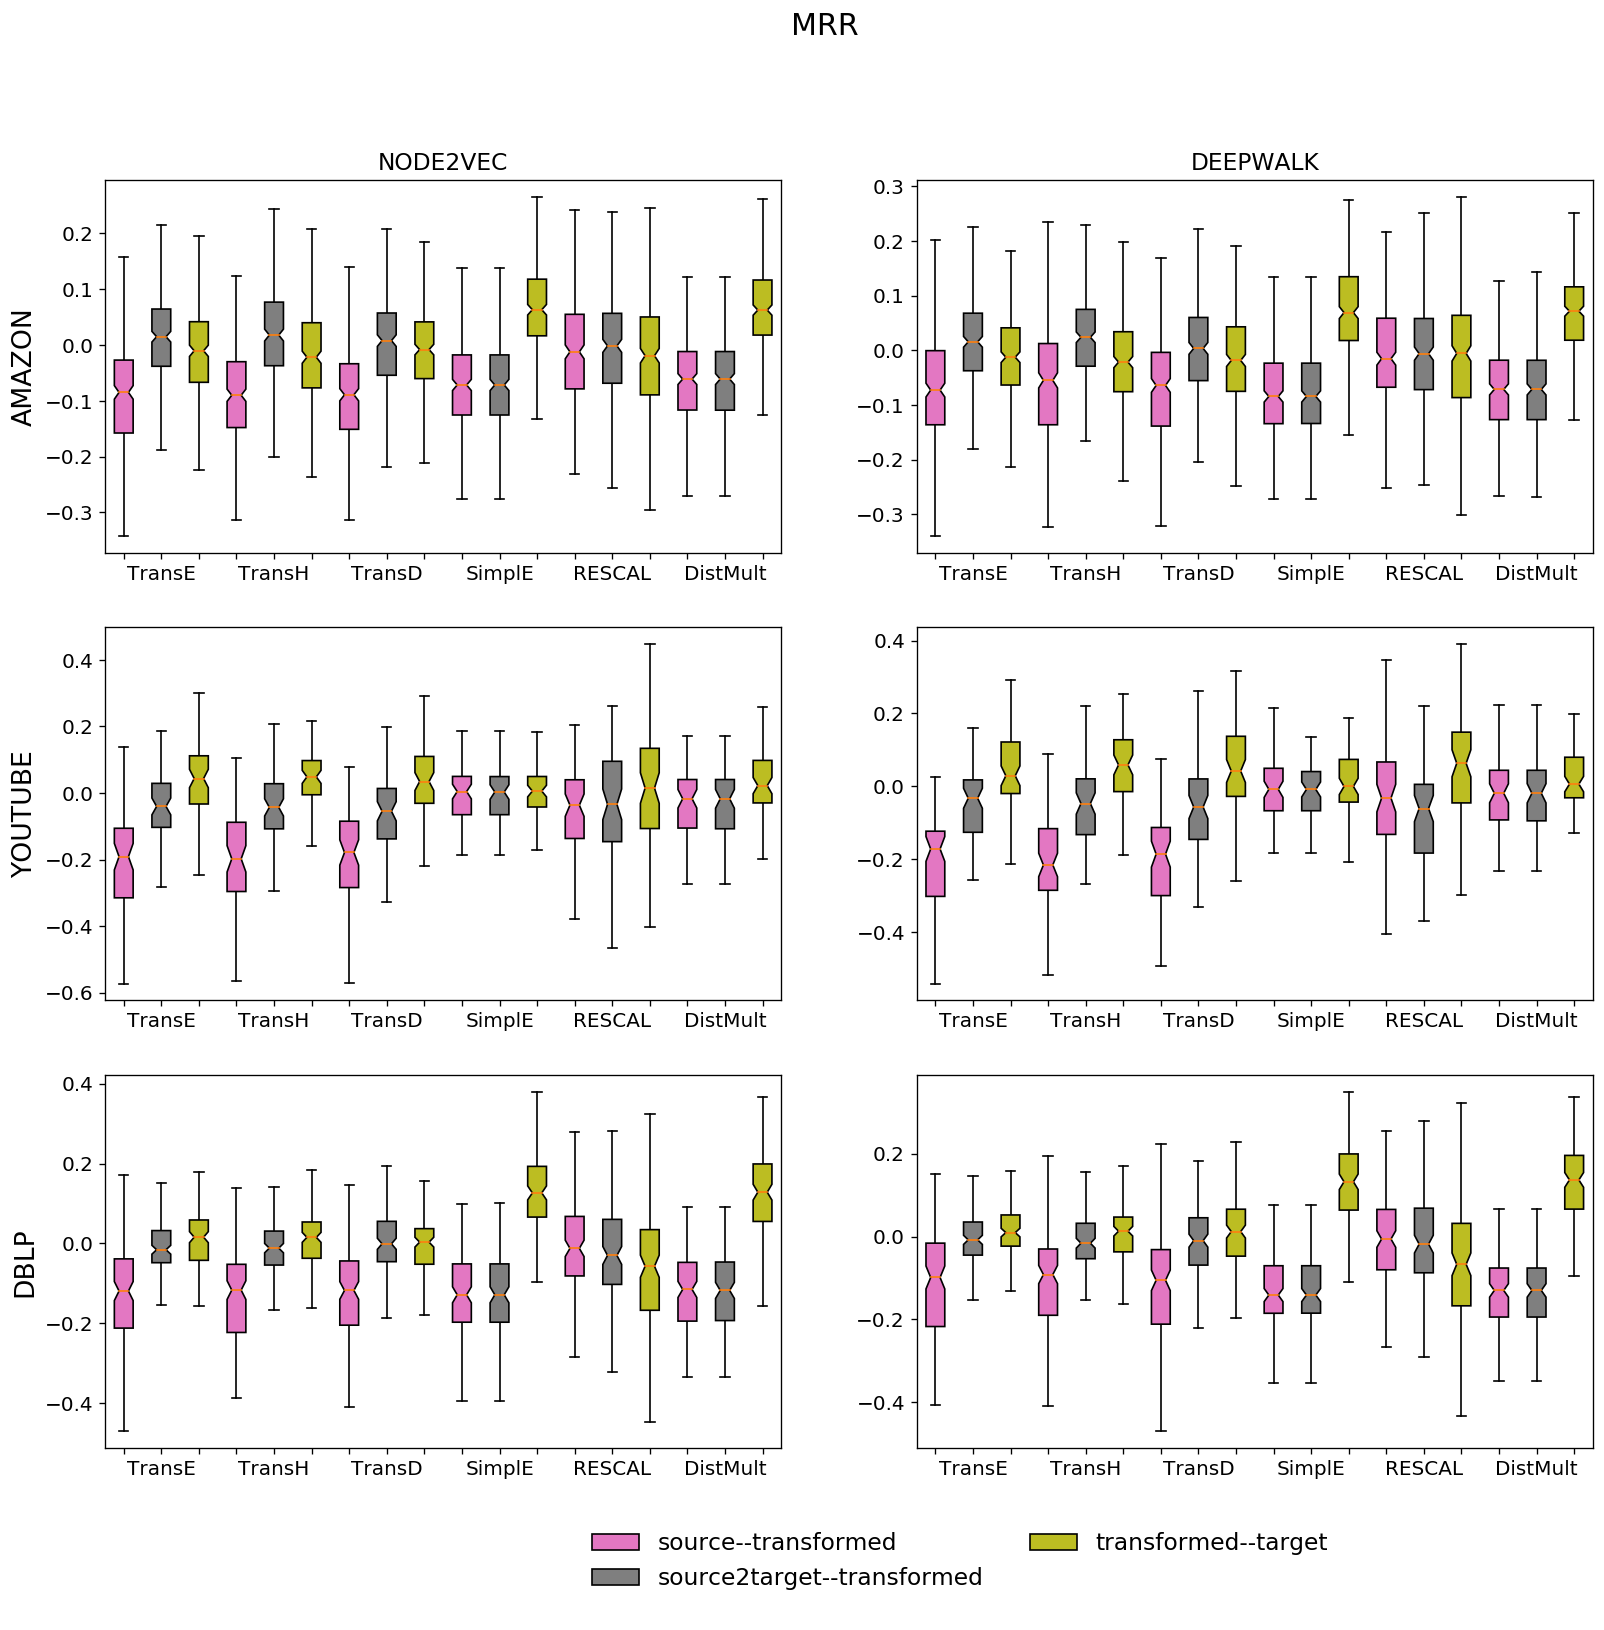

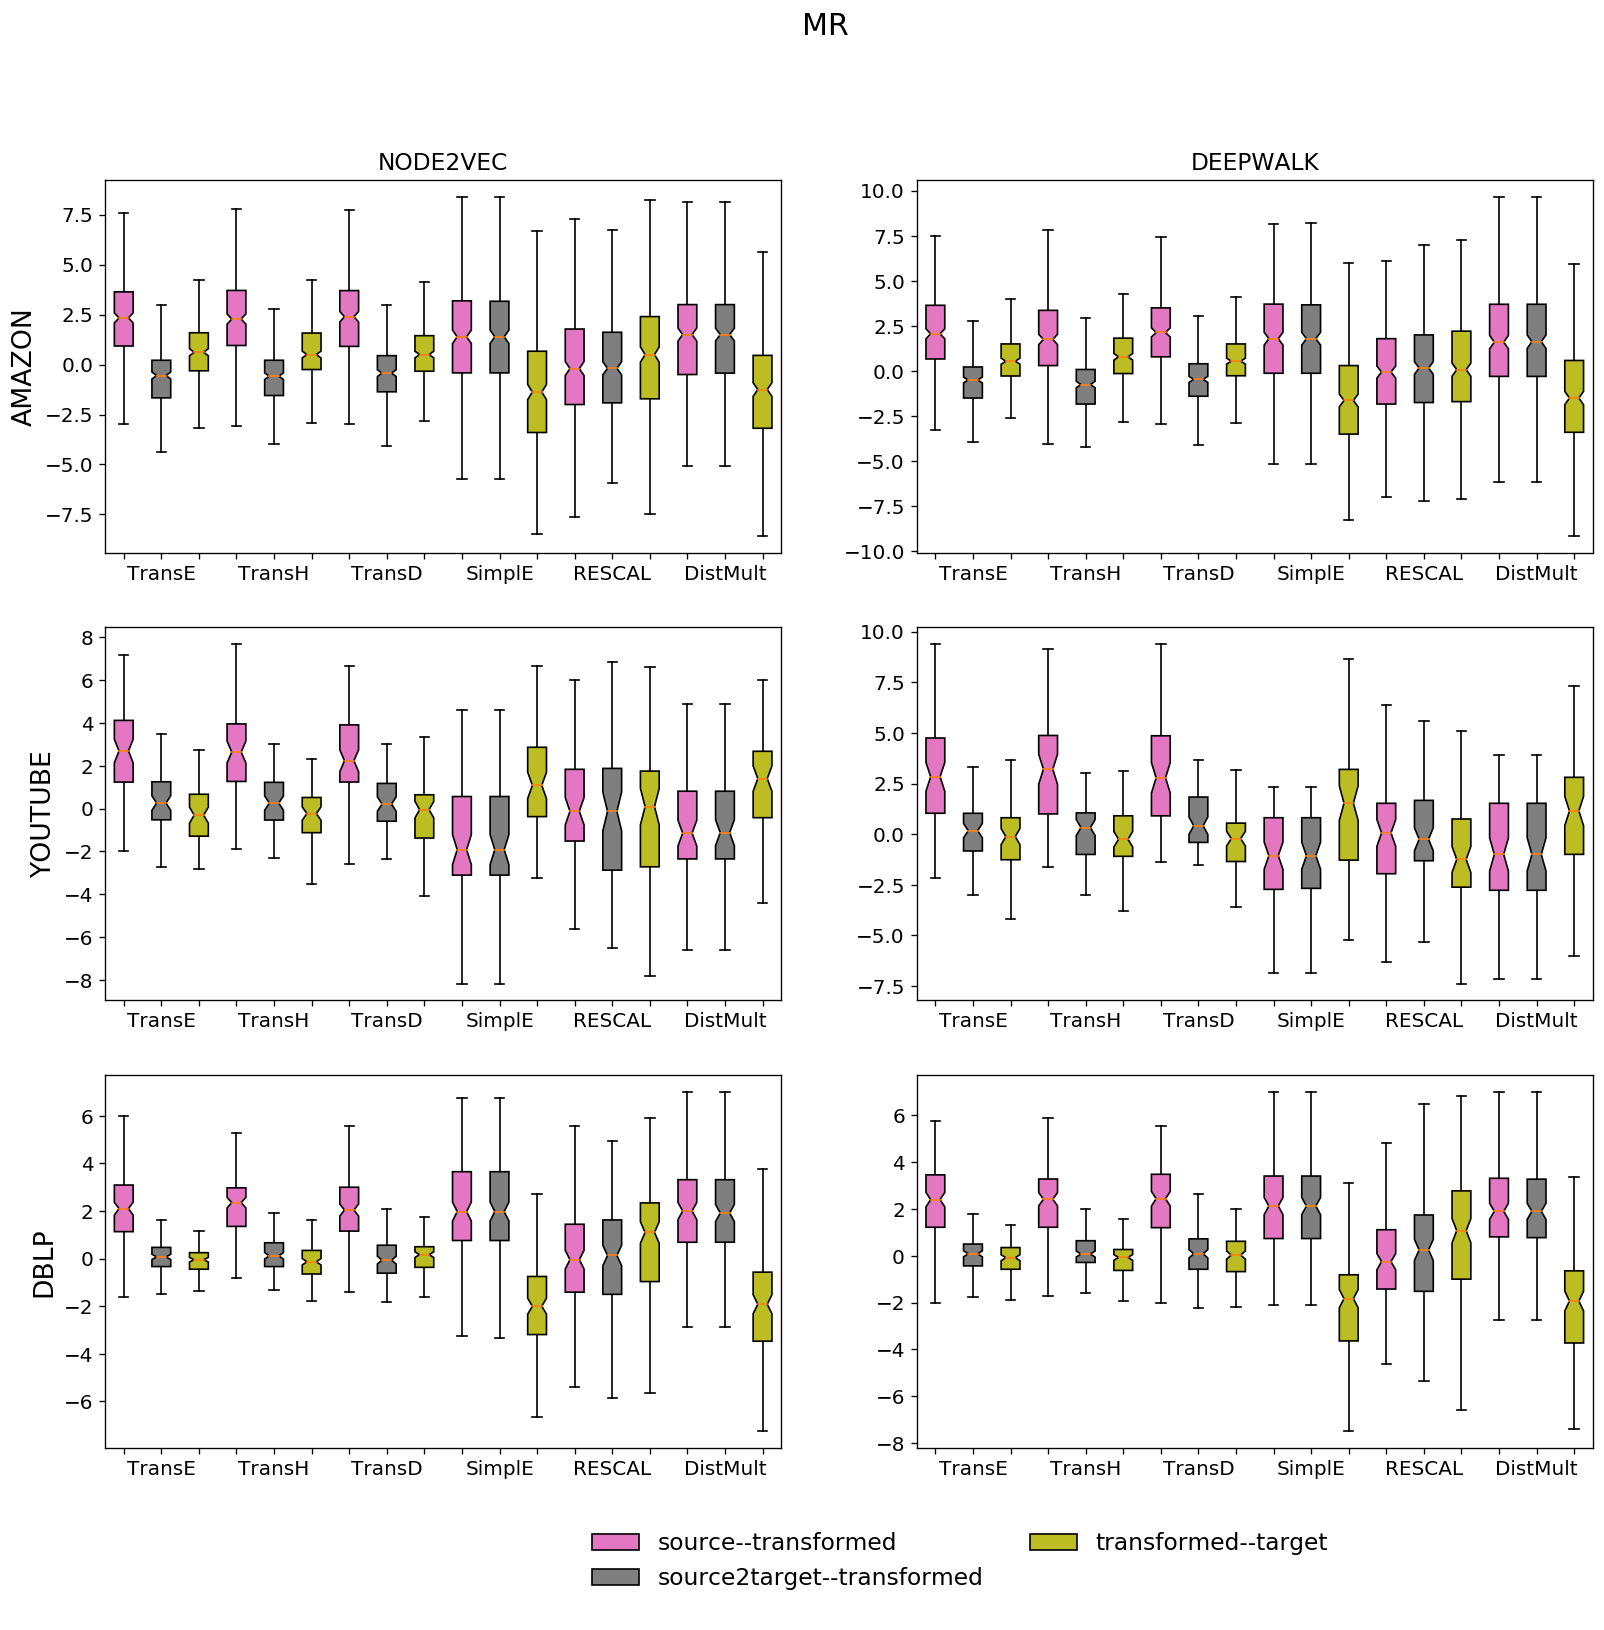

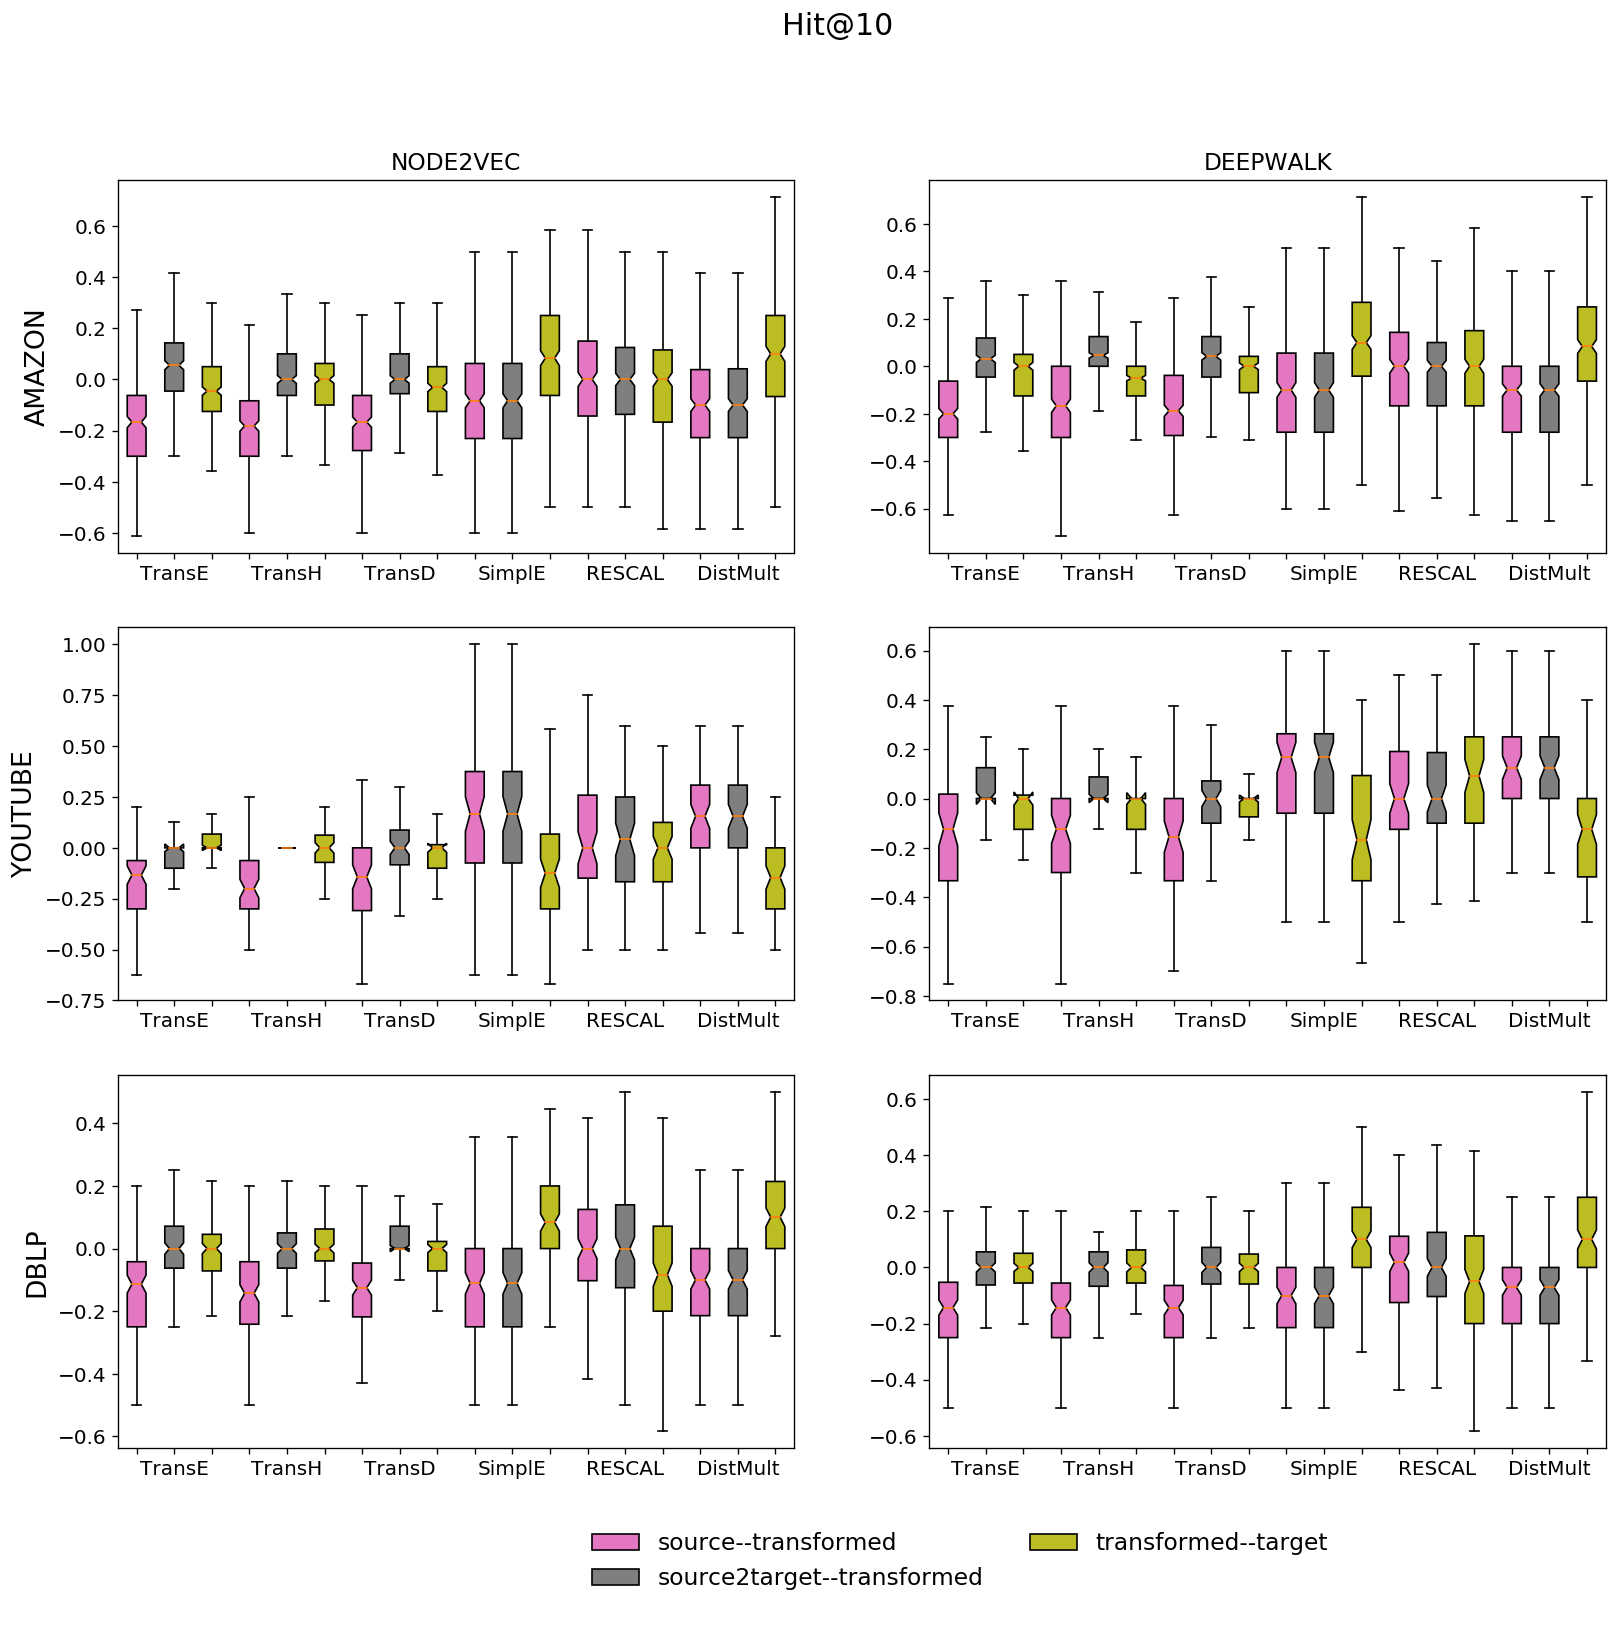

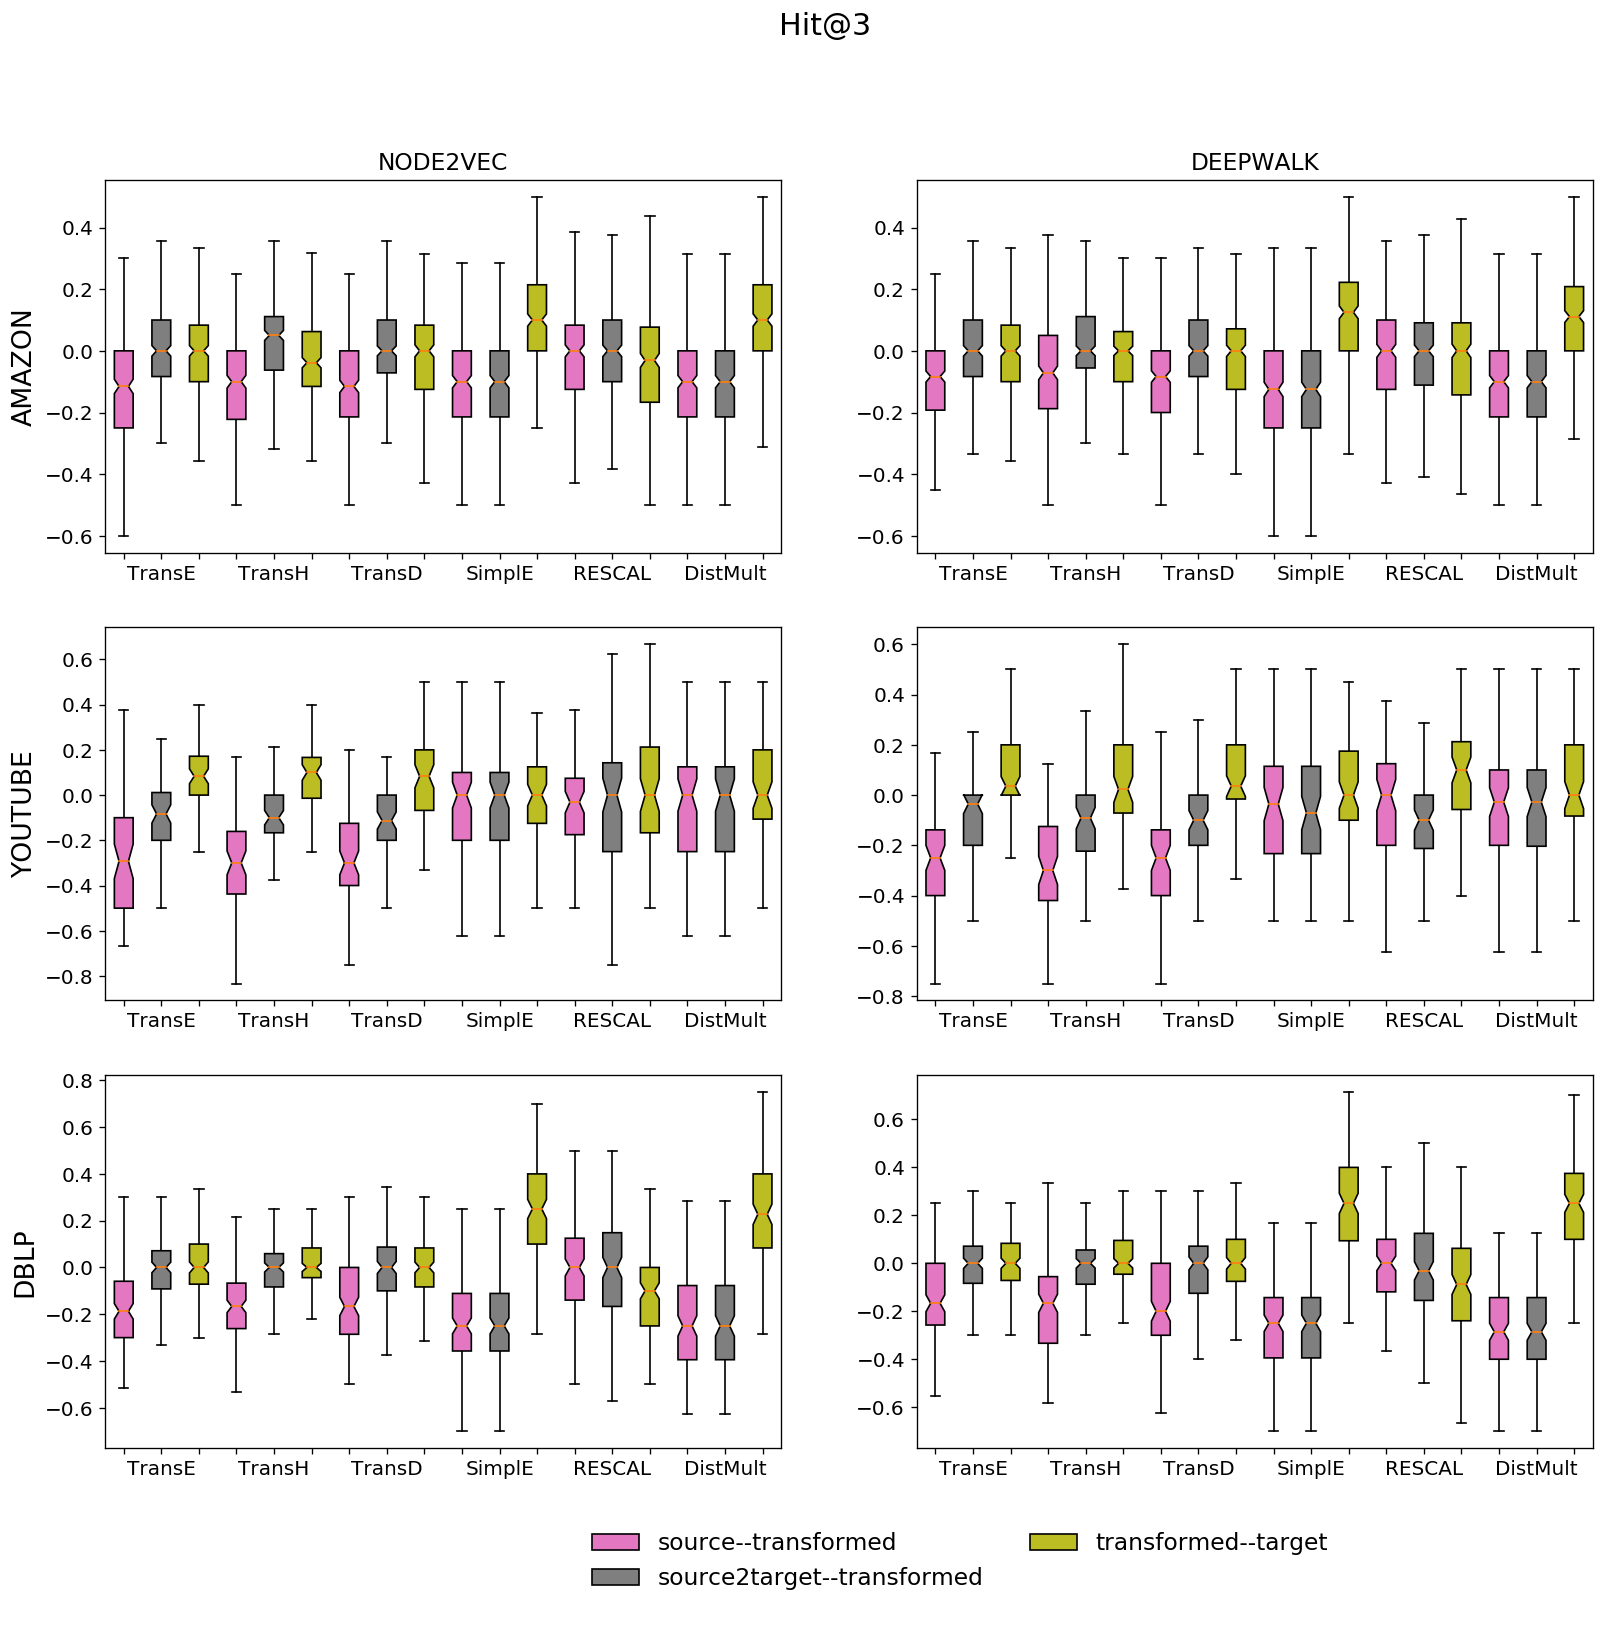

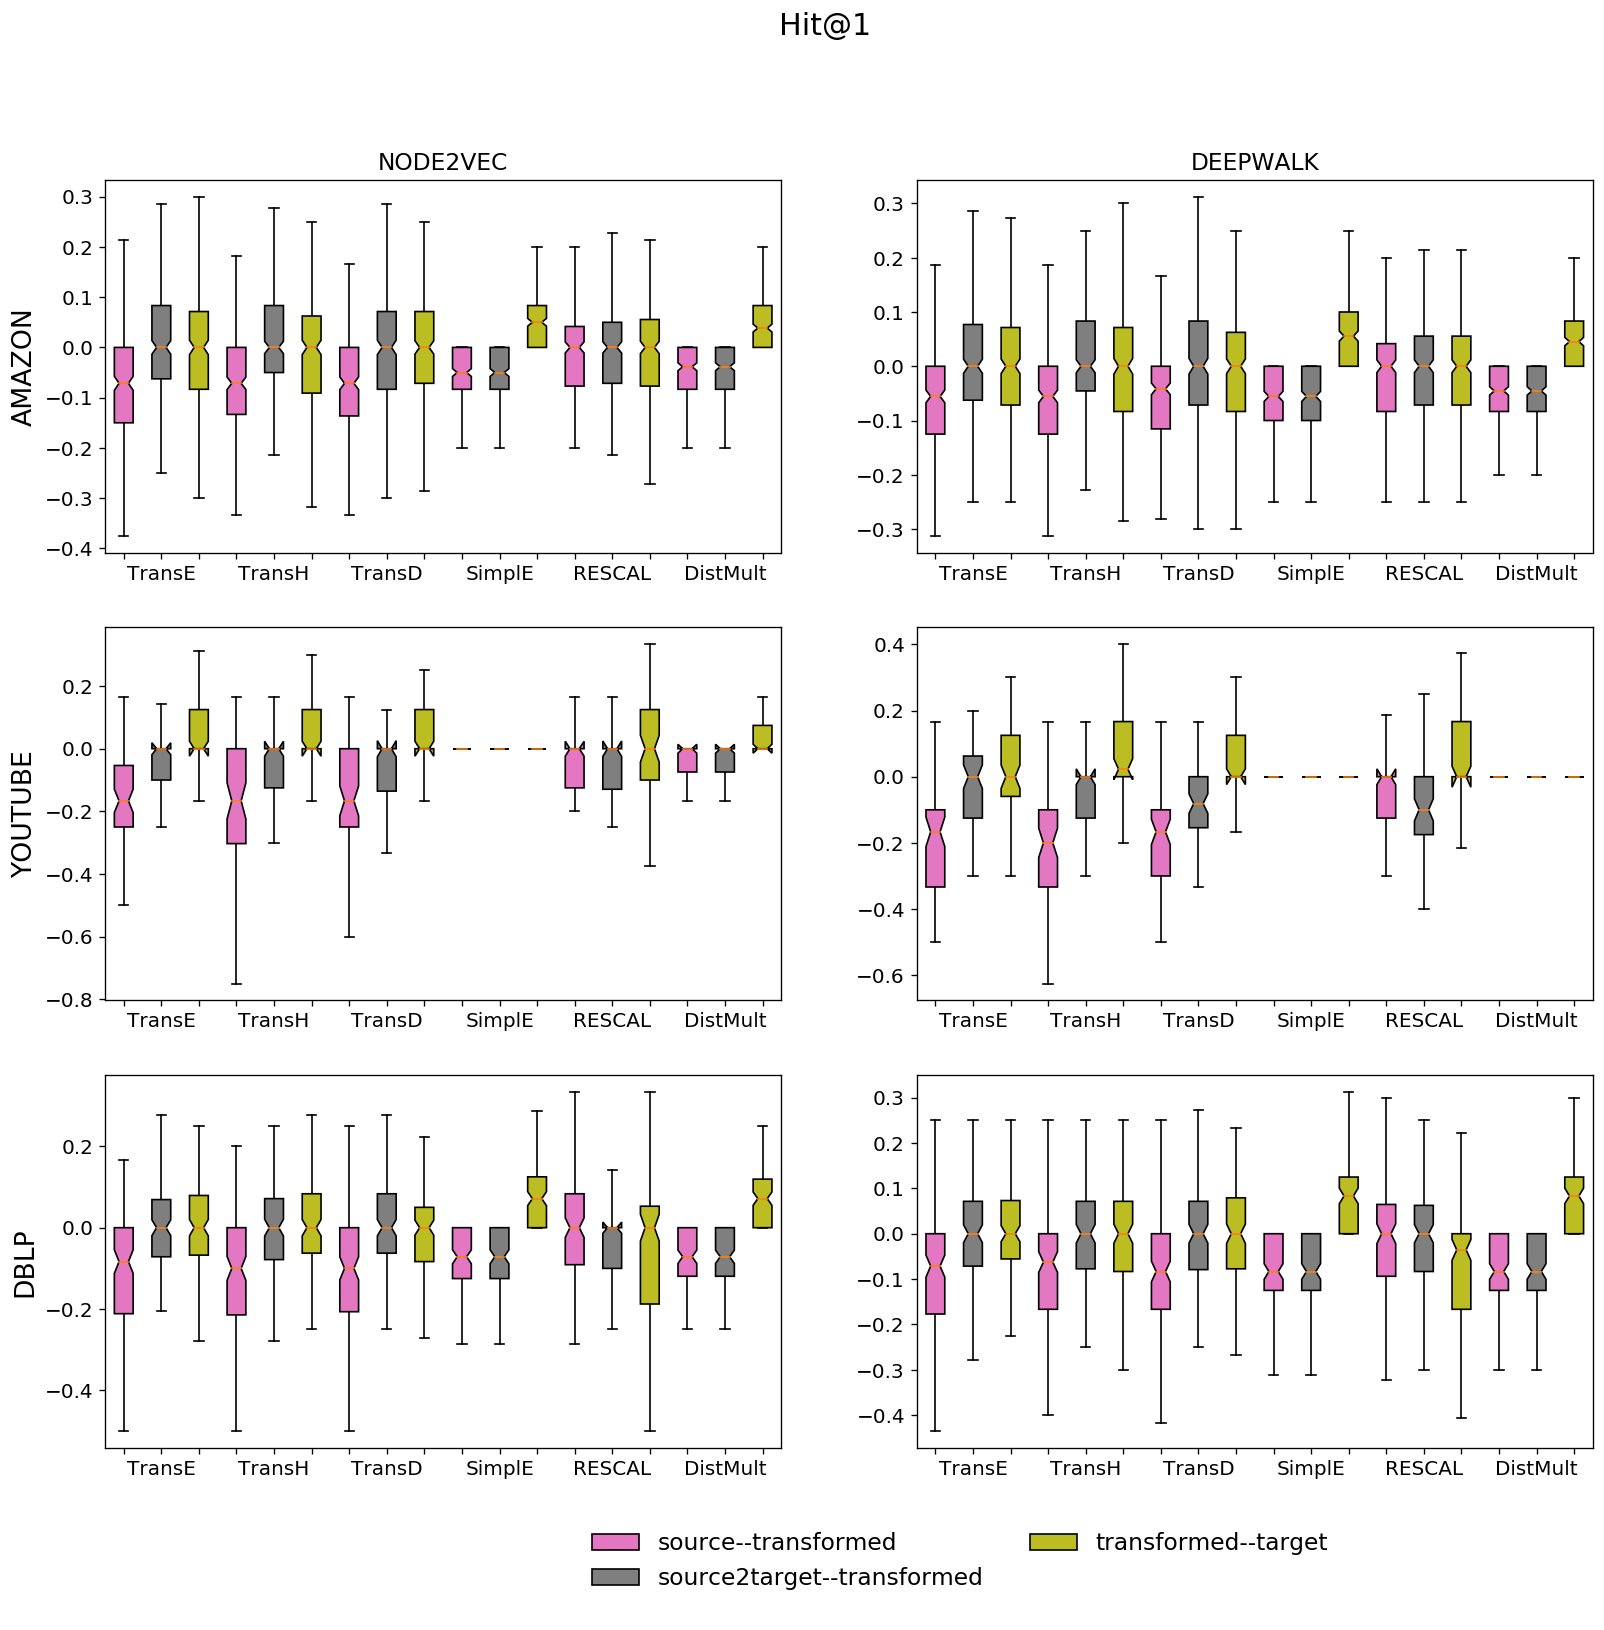

In [6]:
medianprops = dict(linestyle='-.', linewidth=0.5, color='blue')

for measure in measures:
    fig = plt.figure(figsize=(16, 14), dpi= 120, facecolor='w', edgecolor='k')
    i=1
    for j, dataset in enumerate(datasets):
        for source in sources:
            ax = fig.add_subplot(len(datasets), len(sources),i)
            all_stats = []
            for target in targets:
                for method in methods:
                    filt = (df['DATASET'] == dataset) & \
                        (df['SIZE'] == str(dataset_min_nodes[j]) + '-' + str(dataset_max_nodes[j])) & \
                        (df['DIM'] == dim) & \
                        (df['SOURCE'] == source) & \
                        (df['TARGET'] == target) & \
                        (df['METHOD'] == method) & \
                        (df['MEASURE'] == measure) & \
                        (df['SPLIT'] == split)
                    row = df.loc[filt]
                    stats = {'label': '', 'fliers':[]}
                    if method=='source2target--transformed':
                        stats['label'] = target
                    #print('{},{},{},{},{},{},{}\n'.format(dataset,dim,source,target,method,measure,split))
                    for metric in metrics:
                        stats[metric] = row[metric].item()
                    all_stats.append(stats)
            
            bp = ax.bxp(all_stats, shownotches=True,patch_artist=True)
            
            if i%2 == 1:
                ax.set_ylabel(dataset.upper(),fontsize=16)
                
            if j == 0:
                ax.set_title(source.upper(),fontsize=14)
            
            for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12)
            
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(12)
            
            for k,box in enumerate(bp['boxes']):
                box.set(facecolor = colors[k%len(colors)]) 
            
            i+=1
    
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    fig.suptitle(measure, fontsize=18)
    fig.legend(bp['boxes'][:4],methods,loc='lower center',borderpad=0,bbox_to_anchor= (0.5, 0.01), ncol=2, 
            borderaxespad=1, frameon=False, fontsize=14)
    fig.savefig(os.path.join(plot_path,measure + '.png'))
            